1. Simulate liabilities, parents and children
    - Simulate genetic and env liabilities for parents.
    - Construct genetic and simulate env liabilities for children.
2. Apply thresholds to get case-cotrol status

3. Sample from liabilities using MVN
    - Given a covariance matrix, we simulate lots of MVN points
    
4. Calculate posterior means
    - Given a combination of case-control status for parents + children integrate regions
        - Obtain mean value of children genetic liability within region  

In [1]:
import scipy as sp
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
n = 10000
h2 = 0.5

In [2]:
# 1. Simulate liabilities, parents and children
father_gen = stats.norm.rvs(0, sp.sqrt(h2), size=n)
mother_gen = stats.norm.rvs(0, sp.sqrt(h2), size=n)
father_env = stats.norm.rvs(0, sp.sqrt(1-h2), size=n)
mother_env = stats.norm.rvs(0, sp.sqrt(1-h2), size=n)

child_gen = father_gen*sp.sqrt(0.5)+mother_gen*sp.sqrt(0.5)
child_env = stats.norm.rvs(0, sp.sqrt(1-h2), size=n)

child_liab = child_gen + child_env
father_liab = father_gen + father_env
mother_liab = mother_gen + mother_env

array([[1.        , 0.49543894],
       [0.49543894, 1.        ]])

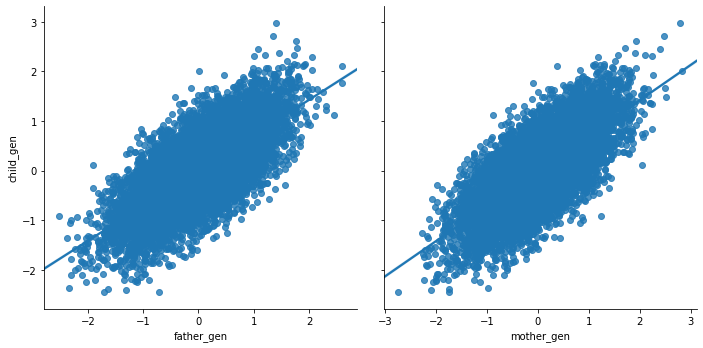

In [3]:
df = pd.DataFrame(data={'father_gen': father_gen, 
                        'mother_gen': mother_gen, 
                        'father_env':father_env, 
                        'mother_env':mother_env, 
                        'child_gen': child_gen, 
                        'child_env': child_env, 
                           })

sns.pairplot(df, x_vars=["father_gen", "mother_gen"], y_vars=["child_gen"],
             height=5, aspect=1, kind="reg")
sp.corrcoef(df["father_gen"],df["child_gen"])**2

In [4]:
sp.var(child_liab)
sp.var(child_liab)

0.9807712065094376

In [10]:
# 2. Apply thresholds to get case-cotrol status
t = 1
cc_father = father_liab>t
cc_mother = mother_liab>t
cc_child = child_liab>t


array([[1.        , 0.03224304],
       [0.03224304, 1.        ]])

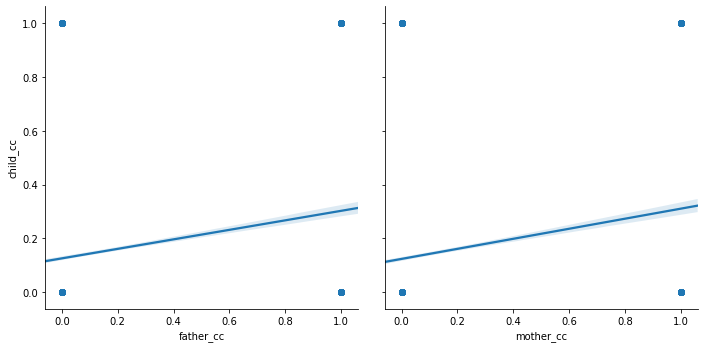

In [11]:
cc_df = pd.DataFrame(data={'father_cc': cc_father, 
                        'mother_cc': cc_mother, 
                        'child_cc': cc_child, 
                           })

sns.pairplot(cc_df, x_vars=["father_cc", "mother_cc"], y_vars=["child_cc"],
             height=5, aspect=1, kind="reg")
sp.corrcoef(cc_df["father_cc"],cc_df["child_cc"])**2

In [ ]:
# 3. Sample from liabilities using MVN
